Stage One - The necessary packages for regresssion model development are imported here. 

Dataset was viewed to see the components, missing data, data distribution. Missing values are replaced with the median, filling the missing values with the median did not significantly affect the data distribution. 

In [1]:
import pandas as pd                                     # data science essentials
import matplotlib.pyplot as plt                         # essential graphical output
import seaborn as sns                                   # enhanced graphical output
from sklearn.model_selection import train_test_split    # train-test split
import numpy as np                                      # mathematical essentials
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from scipy import stats 
from scipy.stats import norm, skew, probplot
from scipy.special import boxcox1p


# setting pandas print options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
#!pip install pandas_profiling
%matplotlib inline

In [2]:
# reading the file into Python
birthdataset = pd.read_excel('birthweight_low.xlsx')

In [3]:
#checking the headers in the dataset
birthdataset.head()

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
0,69,NaN,5,2.0,62,NaN,4,7,23,9,1,0,1,0,0,1,0,697
1,68,12.0,3,10.0,61,11.0,4,6,25,11,1,1,0,0,1,0,0,1290
2,71,12.0,3,6.0,46,12.0,2,7,21,12,1,0,1,0,0,1,0,1490
3,59,16.0,1,8.0,48,16.0,7,8,21,10,0,0,0,1,0,0,1,1720
4,48,12.0,4,6.0,39,12.0,2,9,17,13,0,1,0,0,1,0,0,1956


In [4]:
birthdataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mage    196 non-null    int64  
 1   meduc   193 non-null    float64
 2   monpre  196 non-null    int64  
 3   npvis   193 non-null    float64
 4   fage    196 non-null    int64  
 5   feduc   189 non-null    float64
 6   omaps   196 non-null    int64  
 7   fmaps   196 non-null    int64  
 8   cigs    196 non-null    int64  
 9   drink   196 non-null    int64  
 10  male    196 non-null    int64  
 11  mwhte   196 non-null    int64  
 12  mblck   196 non-null    int64  
 13  moth    196 non-null    int64  
 14  fwhte   196 non-null    int64  
 15  fblck   196 non-null    int64  
 16  foth    196 non-null    int64  
 17  bwght   196 non-null    int64  
dtypes: float64(3), int64(15)
memory usage: 27.7 KB


In [5]:
#birthdataset.dtypes
birthdataset.isnull().sum()

mage      0
meduc     3
monpre    0
npvis     3
fage      0
feduc     7
omaps     0
fmaps     0
cigs      0
drink     0
male      0
mwhte     0
mblck     0
moth      0
fwhte     0
fblck     0
foth      0
bwght     0
dtype: int64

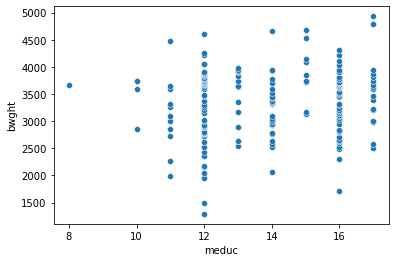

In [6]:
# developing a scatterplot to see data distribution
sns.scatterplot(x = 'meduc', 
                y    = 'bwght',
                data = birthdataset)

# Showing the results
plt.show()

In [7]:
#Fill missing values with median
birthdataset = birthdataset.fillna(birthdataset.median())

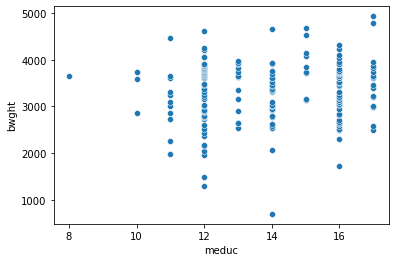

In [8]:
# checking if there is a change in distribution after missing record imputation
sns.scatterplot(x = 'meduc', 
                y    = 'bwght',
                data = birthdataset)

# SHOWing the results
plt.show()

From the visual inspection, there is no change in distribution

In [9]:
#birthdataset.dtypes
birthdataset.isnull().sum()

mage      0
meduc     0
monpre    0
npvis     0
fage      0
feduc     0
omaps     0
fmaps     0
cigs      0
drink     0
male      0
mwhte     0
mblck     0
moth      0
fwhte     0
fblck     0
foth      0
bwght     0
dtype: int64

Stage Two - The data is further exoplored to check for skeweness before regression modelling. The data is adjusted here for even distribution to aid further data analysis. 

The dataset is then split into training and testing set for regression analysis

In [10]:
#Separate the dataset into feature and target sets
features = birthdataset.drop(['bwght'], axis =1)
target = birthdataset['bwght']

In [11]:
#Check for Skewness in the feature set
numerical = features.dtypes[features.dtypes != 'object'].index
skewness = birthdataset[numerical].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

In [12]:
#Print number of columns with skewness
skewness_df = pd.DataFrame({'Skewness': skewness})
print(skewness_df)

(abs(skewness) > 0.75).value_counts()

        Skewness
npvis   2.209135
monpre  2.016275
fage    1.111832
mwhte   1.033800
mage    0.915121
foth    0.815455
fblck   0.666898
moth    0.643120
fwhte   0.643120
mblck   0.482875
drink   0.233074
cigs    0.031636
meduc  -0.071283
male   -0.205152
feduc  -1.328265
fmaps  -2.531710
omaps  -2.620920


True     9
False    8
dtype: int64

In [13]:
#Treat skewness with Log transformation

#Reading dataset
birthdataset = pd.read_excel('birthweight_low.xlsx')
birthdataset = birthdataset.fillna(birthdataset.median())

all_cols = ['monpre', 'omaps', 'fmaps', 'male','mwhte','mblck', 'moth','fwhte','fblck', 'foth',
            'mage', 'fage', 'npvis', 'feduc','meduc', 'cigs', 'drink']
cont_cols = ['mage', 'fage', 'npvis', 'feduc','meduc', 'cigs', 'drink' ]
cat_cols = ['monpre', 'omaps', 'fmaps', 'male','mwhte','mblck', 'moth','fwhte','fblck', 'foth']


#converting all continuous columns to log forms
log_ordinal = np.log(birthdataset[cont_cols].fillna(0)+1) # 1 is used,incase there is division by 0

#creating dataframe that contains only categorical and target variables
categorical = birthdataset[cat_cols]
target = birthdataset['bwght']

#merging dataframe
features = pd.concat([log_ordinal, categorical], axis=1)
entire = pd.concat([features, target], axis=1)

#splitting data into test and train. Train and test the model
def test(models, data, iterations = 100):
    results = {}
    y= entire['bwght']
    X= entire.drop(['bwght'], axis =1)
    for i in models:
        r2_train = []
        r2_test = []
        for j in range(iterations):
            X_train, X_test, y_train, y_test = train_test_split(X, 
                                                                y, 
                                                                test_size= 0.25,random_state=219)
            r2_test.append(metrics.r2_score(y_test,
                                            models[i].fit(X_train, 
                                                         y_train).predict(X_test)))
            r2_train.append(metrics.r2_score(y_train, 
                                             models[i].fit(X_train, 
                                                          y_train).predict(X_train)))
        results[i] = [np.mean(r2_train), np.mean(r2_test)]
        
    return pd.DataFrame(results)

#checking result for all four models
models = {'OLS': linear_model.LinearRegression(),
         'Lasso': linear_model.Lasso(),
         'ARD': linear_model.ARDRegression(),
         'KNN': KNeighborsRegressor(),}



test(models, entire)

,OLS,Lasso,ARD,KNN
0,0.661990,0.661398,0.652369,0.528577
1,0.492236,0.501583,0.542617,0.347888


From the result above, ARD model gave the best result on the test data. Hyperparameter tuning was done afterwards on the ARD model to see if there would be improvement in the test score. 

In [14]:
#Applying tuned hyperparameters on  log transformed dataset
all_cols = ['monpre', 'omaps', 'fmaps', 'male','mwhte','mblck', 'moth','fwhte','fblck', 'foth',
            'mage', 'fage', 'npvis', 'feduc','meduc', 'cigs', 'drink']
cont_cols = ['mage', 'fage', 'npvis', 'feduc','meduc', 'cigs', 'drink' ]
cat_cols = ['monpre', 'omaps', 'fmaps', 'male','mwhte','mblck', 'moth','fwhte','fblck', 'foth']

#reading dataset
birthdataset = pd.read_excel('birthweight_low.xlsx')
birthdataset = birthdataset.fillna(birthdataset.median())

log_ordinal = np.log(birthdataset[cont_cols].fillna(0)+1)
categorical = birthdataset[cat_cols]
target = birthdataset['bwght']
birthdataset = pd.concat([log_ordinal, categorical,target], axis=1)

#Divide dataset into test and train sets
train, test = train_test_split(birthdataset, test_size= 0.25,random_state=219)

#Divide train and test datasets into X- and y-variables
y_train= train['bwght']
X_train= train.drop(['bwght'], axis =1)
y_test= test['bwght']
X_test= test.drop(['bwght'], axis =1)


#Initiate the regression algorithm instance and fit model on train data
# Bayesian Automatic Relevance Regression is used here
#The hyperparameters were gotten after tuning,this was done using the original dataset
#The log data did not yield good result after tuning
ARDRegression_model_log_version = linear_model.ARDRegression(tol= 100, normalize= False, n_iter=1000, lambda_2= 0.1, lambda_1=0.0001, 
                                                 fit_intercept= True, compute_score=False, alpha_2= 0.0001, alpha_1= 0.0001)
#Train the algorithm i.e fit a model
ARDRegression_model_log_version.fit(X_train, y_train)

#Get R squared for both train and test sets
training_score = round(float(metrics.r2_score(y_train,ARDRegression_model_log_version.predict(X_train))),2)
test_score = round(float(metrics.r2_score(y_test, ARDRegression_model_log_version.predict(X_test))),2)
train_test_gap = abs(round((training_score - test_score),2))


#Print the required output
print(f""" 
Model Type :    {ARDRegression_model_log_version}

Training Score: {training_score}

Testing Score:  {test_score}

Train-Test Gap: {train_test_gap}
""")


 
Model Type :    ARDRegression(alpha_1=0.0001, alpha_2=0.0001, lambda_1=0.0001, lambda_2=0.1,
              n_iter=1000, tol=100)

Training Score: 0.65

Testing Score:  0.56

Train-Test Gap: 0.09



The combination of hyperparameter tuning and natural Log transformation did not achieve the desired result. Box Cox transformation was then used as it yielded better result

In [15]:
#Apply transform on the feature columns in the original dataset
#Normalise columns with skewness greater than absolute 0.75
# Set lambda parameter in the boxcox function to 0.4
birthdataset = pd.read_excel('birthweight_low.xlsx')
birthdataset = birthdataset.fillna(birthdataset.median())
boxcox_features = skewness_df[np.abs(skewness_df['Skewness'])>0.75].index
lam = 0.15
for col in boxcox_features:
    birthdataset.loc[:, col] = boxcox1p(birthdataset[col], lam)

#Divide dataset into test and train sets
train, test = train_test_split(birthdataset, test_size= 0.25,random_state=219)

#Divide train and test datasets into X- and y-variables
y_train= train['bwght']
X_train= train.drop(['bwght'], axis =1)
y_test= test['bwght']
X_test= test.drop(['bwght'], axis =1)


#Initiate the regression algorithm instance and fit model on train data
# Bayesian Automatic Relevance Regression is used here
#The hyperparameters were gotten after tuning
ARDRegression_model = linear_model.ARDRegression(tol= 100, normalize= False, n_iter=700, lambda_2= 0.01, lambda_1=1e-05, 
                                                 fit_intercept= True, compute_score=False, alpha_2= 0.0001, alpha_1= 1e-05)
#Train the algorithm i.e fit a model
ARDRegression_model.fit(X_train, y_train)

#Get R squared for both train and test sets
training_score = round(float(metrics.r2_score(y_train,ARDRegression_model.predict(X_train))),2)
test_score = round(float(metrics.r2_score(y_test, ARDRegression_model.predict(X_test))),2)
train_test_gap = abs(round((training_score - test_score),2))


In [16]:
#Print the required output
print(f""" 
Model Type :    {ARDRegression_model}

Training Score: {training_score}

Testing Score:  {test_score}

Train-Test Gap: {train_test_gap}
""")

 
Model Type :    ARDRegression(alpha_1=1e-05, alpha_2=0.0001, lambda_1=1e-05, lambda_2=0.01,
              n_iter=700, tol=100)

Training Score: 0.69

Testing Score:  0.71

Train-Test Gap: 0.02

